# Kaggle Competition

In [1]:
## Libraries 
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.tree import ExtraTreeRegressor as ETR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.linear_model import LinearRegression as LR
from mlxtend.regressor import StackingRegressor
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.naive_bayes import MultinomialNB as MNB
from sklearn.linear_model import SGDRegressor as SGDR
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import ComplementNB as CNB
from sklearn.naive_bayes import BernoulliNB as BNB
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error as mse

# Loading & Cleaning Data

In [2]:
# Loading Train csv
solar_train = pd.read_csv('C:/Users/Data Analyst/Documents/Otros/Competencia Kaggle/solar_train.csv')
solar_train.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475175023,9/29/2016 12:00:00 AM,08:50:23,634.99,61,30.46,41,14.96,6.75,06:13:00,18:13:00
1,1481799902,12/15/2016 12:00:00 AM,01:05:02,1.27,37,30.26,70,207.43,5.62,06:50:00,17:46:00
2,1478339417,11/4/2016 12:00:00 AM,23:50:17,1.21,47,30.49,33,168.20,5.62,06:25:00,17:47:00
3,1472887208,9/2/2016 12:00:00 AM,21:20:08,1.67,54,30.46,101,152.60,3.37,06:07:00,18:37:00
4,1478724901,11/9/2016 12:00:00 AM,10:55:01,839.78,62,30.47,36,291.95,7.87,06:28:00,17:45:00


In [3]:
# Data info, column type, null count 
print(solar_train.isna().sum(), solar_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24514 entries, 0 to 24513
Data columns (total 11 columns):
UNIXTime                  24514 non-null int64
Data                      24514 non-null object
Time                      24514 non-null object
Radiation                 24514 non-null float64
Temperature               24514 non-null int64
Pressure                  24514 non-null float64
Humidity                  24514 non-null int64
WindDirection(Degrees)    24514 non-null float64
Speed                     24514 non-null float64
TimeSunRise               24514 non-null object
TimeSunSet                24514 non-null object
dtypes: float64(4), int64(3), object(4)
memory usage: 2.1+ MB
UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet          

In [4]:
## changing columns from object to datetime
import datetime 
solar_train['Data']=pd.to_datetime(solar_train['Data'],format='%m/%d/%Y %I:%M:%S %p')

In [5]:
solar_train.sort_values(by=['Data'], inplace=True, ascending=False)

In [6]:
solar_train.drop(columns = ['UNIXTime']).describe()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,24514.000000,24514.000000,24514.000000,24514.000000,24514.000000,24514.000000
mean,208.062687,51.105287,30.422713,75.002284,143.129305,6.248435
std,316.133238,6.214280,0.054754,25.999994,82.939584,3.482597
min,1.130000,34.000000,30.190000,11.000000,0.090000,0.000000
25%,1.230000,46.000000,30.400000,55.000000,81.872500,3.370000
50%,2.720000,50.000000,30.430000,85.000000,147.585000,5.620000
75%,359.927500,55.000000,30.460000,97.000000,179.217500,7.870000
max,1601.260000,71.000000,30.560000,103.000000,359.950000,39.370000


# Analysis & Models with Train Data

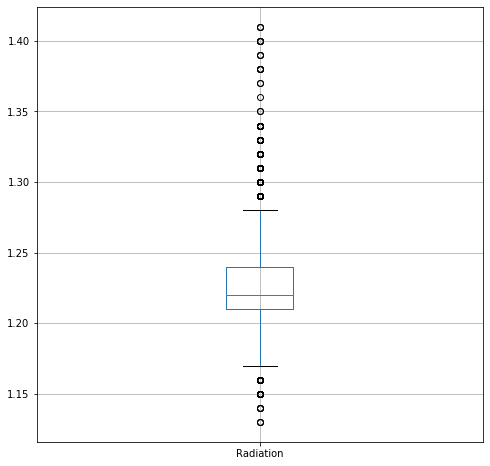

In [92]:
## Searching outliers 
import matplotlib.pyplot as plt 
plt.figure(figsize = (8,8))
solar_train.boxplot(column = ['Radiation'] )
plt.show()

In [93]:
## Cleaning outliers 
q1 = np.percentile(solar_train.Radiation,25)
q3 = np.percentile(solar_train.Radiation,75)
iqr = q3-q1
upper = q3+(3*iqr)
lower = q1-(3+iqr)

len(solar_train[solar_train.Radiation<lower])

0

In [94]:
solar_train = solar_train[solar_train.Radiation<upper]
solar_train.shape

(10800, 7)

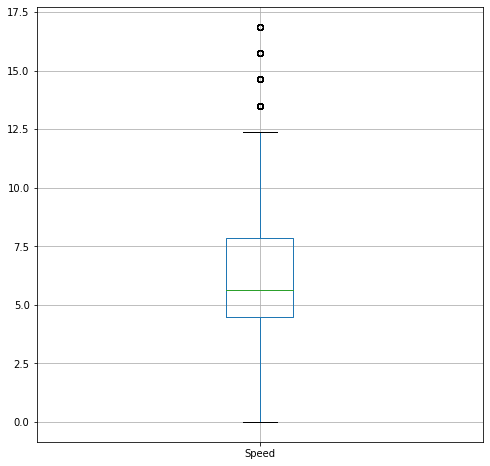

In [95]:
plt.figure(figsize = (8,8))
solar_train.boxplot(column = ['Speed'] )
plt.show()

In [96]:
# Cleaning outliers for speed variable
q1 = np.percentile(solar_train.Speed,25)
q3 = np.percentile(solar_train.Speed,75)
iqr = q3-q1
upper = q3+(3*iqr)
lower = q1-(3+iqr)

len(solar_train[solar_train.Speed<lower])

0

In [97]:
solar_train = solar_train[solar_train.Speed<upper]
solar_train.shape

(10800, 7)

In [13]:
solar_train.rename(columns = {'WindDirection(Degrees)':'WindDirection'}, inplace = True)

In [98]:
# Cleaning outliers for wind direction variable
q_1 = np.percentile(solar_train.WindDirection,25)
q_3 = np.percentile(solar_train.WindDirection,75)
iqr = q_3-q_1
upper = q_3+(3*iqr)
lower = q_1-(3+iqr)

len(solar_train[solar_train.WindDirection<lower])

709

In [99]:
solar_train = solar_train[solar_train.WindDirection<upper]
solar_train.shape

(10799, 7)

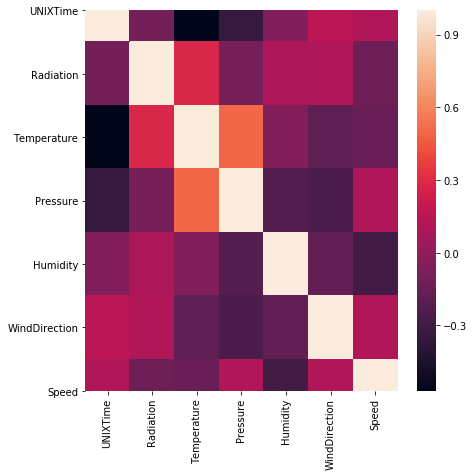

In [85]:
## Correlation status
import seaborn as sns
plt.figure(figsize= (7,7))
sns.heatmap(solar_train.corr());

In [76]:

solar_train = solar_train.select_dtypes(exclude = ['object', 'datetime64[ns]'])

# Models

In [100]:
# Data selection for train and test
X = solar_train
y = solar_train.Radiation
X_train, X_test, y_train, y_test = tts(X,y, test_size = .20, random_state= 42)

In [101]:
rf = RFR()
rf.fit(X_train, y_train)

train_score=rf.score(X_train, y_train)
test_score=rf.score(X_test, y_test)
print (train_score, test_score)

0.999995604931662 1.0


C:\Users\Data Analyst\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Running Process with Test data

In [20]:
solar_test = pd.read_csv('C:/Users/Data Analyst/Documents/Otros/Competencia Kaggle/solar_test.csv')

In [21]:
solar_test.head(2)

,id,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,0,1478720107,11/9/2016 12:00:00 AM,09:35:07,59,30.47,44,312.67,3.37,06:28:00,17:45:00
1,1,1474063503,9/16/2016 12:00:00 AM,12:05:03,59,30.48,83,38.01,6.75,06:10:00,18:25:00


# Analysis & Model Applied with Test Data

In [37]:
solar_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8172 entries, 0 to 8171
Data columns (total 7 columns):
id                        8172 non-null int64
UNIXTime                  8172 non-null int64
Temperature               8172 non-null int64
Pressure                  8172 non-null float64
Humidity                  8172 non-null int64
WindDirection(Degrees)    8172 non-null float64
Speed                     8172 non-null float64
dtypes: float64(3), int64(4)
memory usage: 447.0 KB


In [54]:
solar_test = solar_test.select_dtypes(exclude = ['object'])

In [102]:
x_stest = solar_test
y_pred =rf.predict(x_stest)
y1 = pd.DataFrame(y_pred)

In [103]:
yc = y.tail(8172)


In [104]:
mse(y_pred, yc)

0.010054760156632422

In [105]:
y1.to_csv('C:/Users/Data Analyst/Documents/Otros/Competencia Kaggle/results4.csv')